# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import math
import statistics

pd.options.display.max_rows = 1000

# Reading the train data

In [3]:
train_data = pd.read_csv('application_train.csv',index_col='SK_ID_CURR')
print('The size of train_data is:',train_data.shape)

The size of train_data is: (307511, 121)


In [5]:
# Checking data
display(train_data.head().T)

SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500,270000,67500,135000,121500
AMT_CREDIT,406598,1.2935e+06,135000,312682,513000
AMT_ANNUITY,24700.5,35698.5,6750,29686.5,21865.5
AMT_GOODS_PRICE,351000,1.1295e+06,135000,297000,513000


In [6]:
#Basic statistics of data
display(train_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00


In [7]:
#Data types
train_data.dtypes

TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [8]:
#Checking name of columns
list(train_data)

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BU

In [9]:
#Checking vull values in data and its proportion to each column
def missing_values_table(df):
    missing_value = df.isnull().sum()
    missing_value_percentage = 100 * df.isnull().sum() / len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percentage], axis=1)
    missing_value_table = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    missing_value_table = missing_value_table[missing_value_table.iloc[:,1] != 0].sort_values('% of Total Values',ascending=False).round(1)
    return missing_value_table

missing_values_table(train_data)

,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Exploratory Data Analysis

### Target Class Distribution

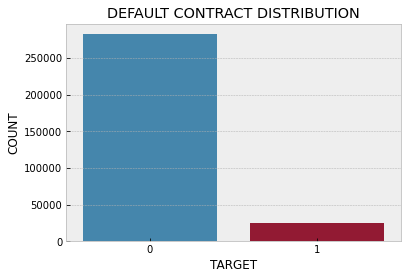

In [13]:
# Checking if the class target balanced or not
sns.countplot(x='TARGET', data=train_data)

plt.xlabel('TARGET')
plt.ylabel('COUNT')
plt.title('DEFAULT CONTRACT DISTRIBUTION')
plt.show()

### Client's Age Distribution based on Target Class

<AxesSubplot:xlabel='AGE', ylabel='Density'>

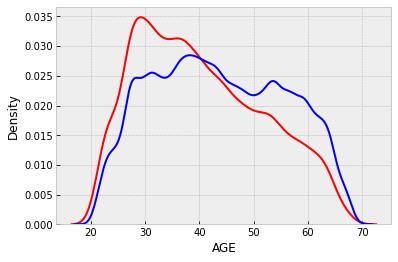

In [14]:
#For more intuitive sight, lets translate DAYS_BIRTH to AGE
train_data['AGE'] = train_data['DAYS_BIRTH'].apply(lambda x: math.floor(x/-365))

#Plotting distribution of Age who Defaulted
plt.style.use('bmh')
sns.kdeplot(train_data[train_data['TARGET'] == 1]['AGE'],color='red')
sns.kdeplot(train_data[train_data['TARGET'] == 0]['AGE'],color='blue')

### Contract Type Percentage

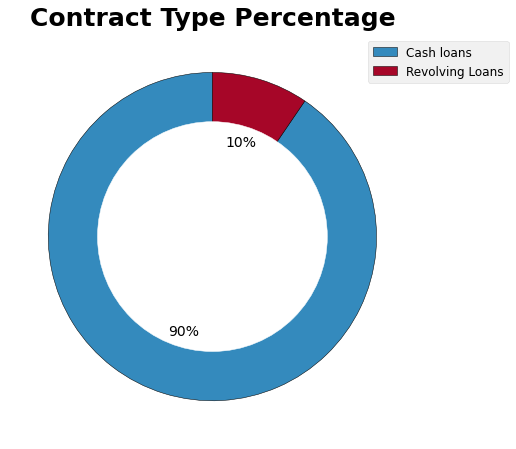

In [15]:
fig, ax = plt.subplots()

size = 0.3
vals = train_data['NAME_CONTRACT_TYPE'].value_counts()
my_circle = plt.Circle((0,0), 0.7, color='white')
cmap = plt.get_cmap("tab20c")
labels = ['Cash loans','Revolving Loans']

ax.pie(vals, radius=1, startangle=90, wedgeprops={'edgecolor': 'black'}, 
       textprops={'fontsize': 14}, autopct='%1.f%%')
plt.gcf().gca().add_artist(my_circle)

fig.set_figheight(8)
fig.set_figwidth(6)
fig.legend(labels=labels, fontsize='large',loc='upper right',bbox_to_anchor=(0.5, 0.35, 0.7, 0.5))
fig.tight_layout()
fig.suptitle('Contract Type Percentage', fontsize=25, y=0.9, fontweight='bold', x=0.5)

fig.savefig('./output-files/graphs-and-charts/contract-type.png')
plt.show()

### Client's Contact Provided

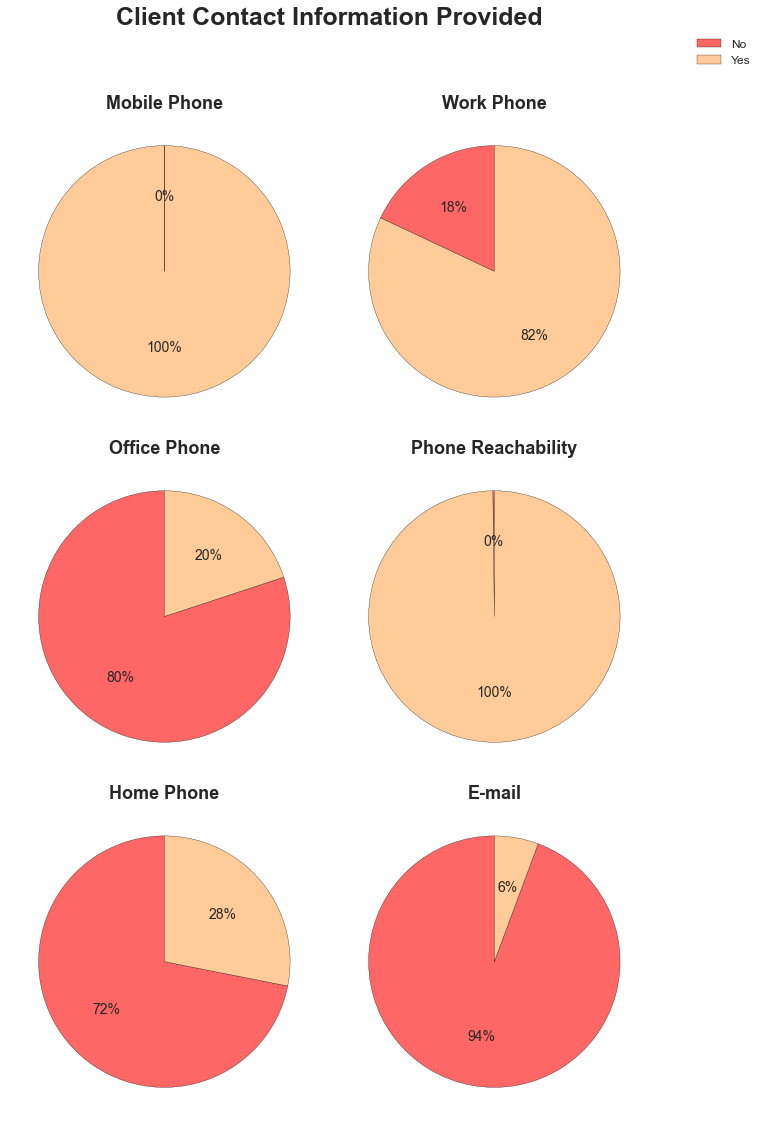

In [16]:
plt.style.use('seaborn')

#Building dataframe consist of customers data provided
cols_list = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
count_value = pd.DataFrame(columns=cols_list,index=[0,1])

for col in cols_list:
    count_value[col]= train_data[col].value_counts().to_frame()
count_value = count_value.T

fig, ax = plt.subplots(nrows=3, ncols=2)

labels = 'No', 'Yes'
colors = ['#ff6666', '#ffcc99']

plt.title('Client Contact Information')
plt.tight_layout()

#Plotting pie chart for every data kind
chart_title = ['Mobile Phone','Work Phone','Office Phone','Phone Reachability','Home Phone','E-mail']

for i in range(0,3):
    for j in range(0,2):
        ax[i,j].pie(count_value.iloc[2*i+j], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, 
                    textprops={'fontsize': 14}, autopct='%1.f%%')
        ax[i,j].set_title(chart_title[2*i+j], fontweight='bold',fontsize= 18)

fig.suptitle('Client Contact Information Provided', fontsize=25, y=1.04, fontweight='bold', x=0.5)
fig.set_figheight(15)
fig.set_figwidth(10)
fig.legend(labels=labels, fontsize='large',loc='upper right',bbox_to_anchor=(0.5, 0.52, 0.6, 0.5))
fig.tight_layout()

fig.savefig('./output-files/graphs-and-charts/client-contact-information-provided.png')

plt.show()

## Client Registered Address

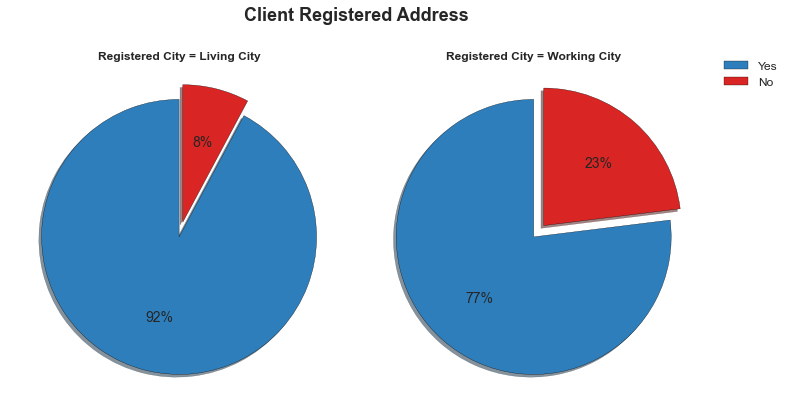

In [17]:
plt.style.use('seaborn')

#Building dataframe consist of customers data provided
cols_list = ['REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY']
count_value = pd.DataFrame(columns=cols_list,index=[0,1])

for col in cols_list:
    count_value[col]= train_data[col].value_counts().to_frame()
count_value = count_value.T

fig, ax = plt.subplots(nrows=1, ncols=2)
a,b = [plt.cm.Blues,plt.cm.Reds]
labels = 'Yes', 'No'

#Plotting pie chart for every data kind
chart_title = ['Registered City = Living City','Registered City = Working City']
explode = (0,0.11)

for i in range(0,2):
    ax[i].pie(count_value.iloc[i], explode = explode, startangle=90, shadow= True, 
              colors=[a(0.7),b(0.7)], wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%',textprops={'fontsize': 14})
    ax[i].set_title(chart_title[i], fontweight='bold')
    
fig.suptitle('Client Registered Address', fontsize=18, y=1, fontweight='bold', x=0.5)
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(labels=labels, fontsize='large',loc=1,bbox_to_anchor=(0.5, 0.4, 0.6, 0.5))
fig.tight_layout()

fig.savefig('./output-files/graphs-and-charts/client-registered-address.png')

plt.show()

### Client's Wealth

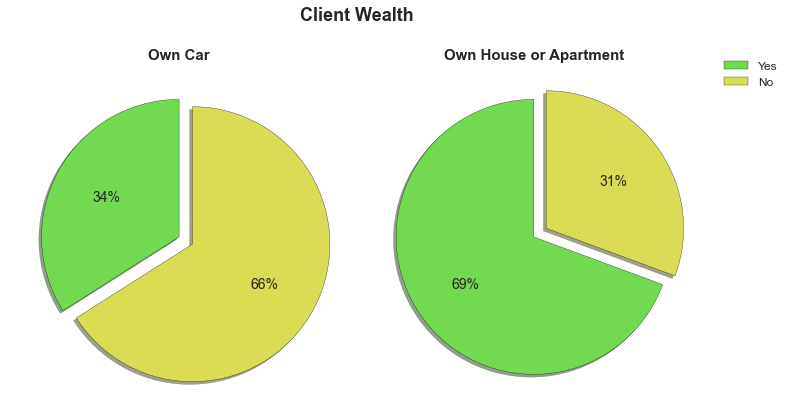

In [18]:
plt.style.use('seaborn')

#Building dataframe consist of customers data provided
cols_list = ['FLAG_OWN_CAR','FLAG_OWN_REALTY']
count_value = pd.DataFrame(columns=cols_list,index=['Y','N'])

for col in cols_list:
    count_value[col]= train_data[col].value_counts().to_frame()
count_value = count_value.T

fig, ax = plt.subplots(nrows=1, ncols=2)
colors = ['#72DA51','#DADC53']
labels = 'Yes', 'No'

#Plotting pie chart for every data kind
chart_title = ['Own Car','Own House or Apartment']
explode = (0,0.11)

for i in range(0,2):
    ax[i].pie(count_value.iloc[i], explode = explode, startangle=90, shadow= True, colors=colors,
              wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%',textprops={'fontsize': 14})
    ax[i].set_title(chart_title[i], fontweight='bold',fontsize=15)
    
fig.suptitle('Client Wealth', fontsize=18, y=1, fontweight='bold', x=0.5)
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(labels=labels, fontsize='large',loc=1,bbox_to_anchor=(0.5, 0.4, 0.6, 0.5))
fig.tight_layout()

fig.savefig('./output-files/graphs-and-charts/client-wealth.png')

plt.show()

### Loan Specification

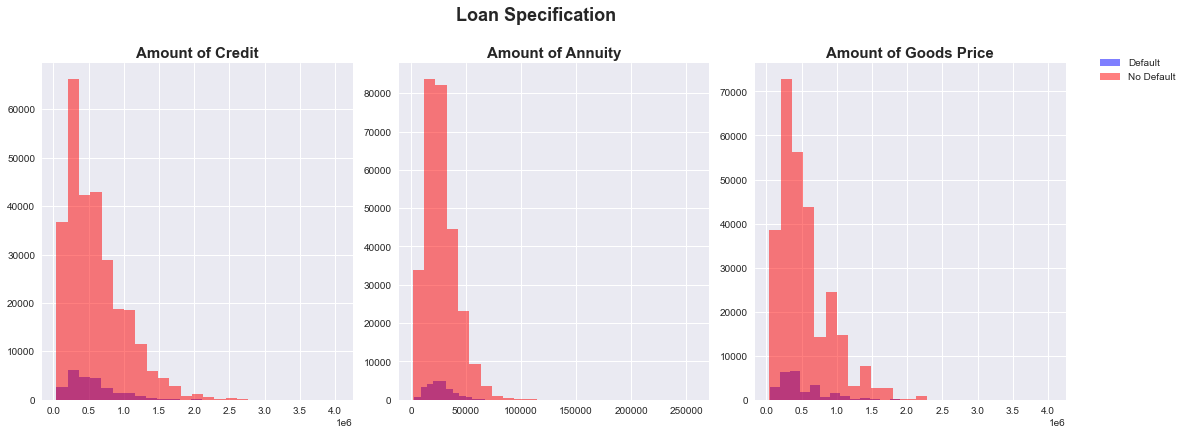

In [19]:
plt.style.use('seaborn')

#Column to plot
cols_list = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

fig, ax = plt.subplots(nrows=1, ncols=3)

chart_title = ['Amount of Credit','Amount of Annuity', 'Amount of Goods Price']
labels = ['Default','No Default']

for i in range(0,3):
    ax[i].hist(train_data[train_data['TARGET'] == 1][cols_list[i]],bins=25,color='b',alpha=0.5)
    ax[i].hist(train_data[train_data['TARGET'] == 0][cols_list[i]],bins=25,color='r',alpha=0.5)
    ax[i].set_title(chart_title[i], fontweight='bold',fontsize=15)
    
fig.suptitle('Loan Specification', fontsize=18, y=1, fontweight='bold', x=0.5)
fig.set_figheight(6)
fig.set_figwidth(15)
fig.tight_layout()
fig.legend(labels=labels,fontsize='medium',loc=1,bbox_to_anchor=(0.5, 0.4, 0.6, 0.5))

fig.savefig('./output-files/graphs-and-charts/loan-specification.png')

plt.show()

### Conclusion on EDA

From the EDA I have done I drew some conclution:<br>
1. Target class is highly imbalance<br>
2. There is a trend where the client's age increasing, the probability of client defaulted decreasing<br>
3. Most of the loans are cash loans<br>
4. Almost all clients provide mobile phone and the phone numbers are reachable.<br>
5. Clients registered address are mostly in the same city where they live, but not where their work<br>
6. Two-third of clients don't have their own car, but two-third of them have their own home<br>
7. Loan specification such as amount loan total, amount annuity, etc does'nt show any trend which refer to the defaulted contracts